In [1]:
import torch
import math
import torch.nn as nn
import torch.optim as optim



ModuleNotFoundError: No module named 'torch'

In [49]:
import random



def initialdraw():
    """"this is provides the initial cards that both
    the dealer and the player have"""
    sum = random.randint(1,10)
    return sum


def draw():
    number = random.randint(1,10)
    variable = random.randint(1,3) #color
    if variable > 2:
        number = number * -1
        return number
    else:
        return number
    

def exploitation(currentsum):
    "the expected value of any given card is +1.833"
    if (21-currentsum)> 1.833:
        return 0 #take another card
    elif (21 < currentsum) or (currentsum < 1):
        return 5 #you lost
    else:
        return 1 #stick
    
    

playersum = 0
dealersum = 0
playersum = initialdraw()
dealersum = initialdraw()
print("the player sum is:", playersum)
print("the dealer sum is:", dealersum)

playerstate = 0
dealerstate = 0
playerstate = (exploitation(playersum))

while True:
    if playerstate == 0: #0 means that you should take another card
        x = draw()
        print("you drew", x)
        playersum += x
        playerstate = exploitation(playersum)
        print("your score is", playersum)
    if playerstate == 1: #1 means that it would be best not to take another card
        print("your final score is", playersum)
        break
    if playerstate == 5: # 5 means that you lost
        print("you lost with a score of ", playersum)
        break



the player sum is: 8
the dealer sum is: 3
you drew -9
your score is -1
you drew 8
your score is 7
you drew 4
your score is 11
you drew -8
your score is 3
you drew 8
your score is 11
you drew 8
your score is 19
you drew 8
your score is 27
you lost with a score of  27


In [ ]:
class Easy21:
    def __init__(self):
        
    def step(self, player_sum, action):
        # player_sum is the state, action could be hit or stick
     
        number = random.randint(1,10) #determines number of the card
        color = random.randint(1,3) #determines color of card
        if color == 3:
            number = number * -1
        else:
            number = number
        
        if (player_sum + number) >

        
        
        
        
       
        return player_sum
    
    
    

Episode: 10000
Episode: 20000
Episode: 30000
Episode: 40000
Episode: 50000
Episode: 60000
Episode: 70000
Episode: 80000
Episode: 90000


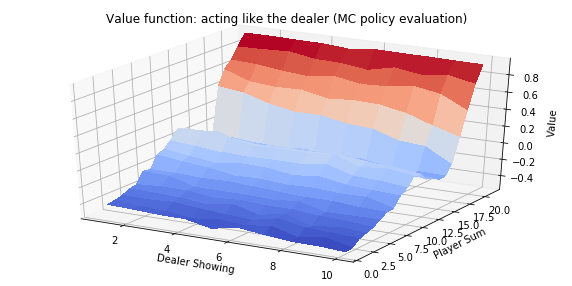

In [10]:
from enum import Enum
import copy 

# for vectors manipulation
import numpy as np

# for plotting stuff
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
# visualize plots in the jupyter notebook
# check more https://goo.gl/U3Ai8R
%matplotlib inline

# for generating random values
import random

# for representing things like card value or colors
from enum import Enum  

# for copying python objects
import copy

def plot_value_function(agent, title='Value Function', generate_gif=False, train_steps=None):
    '''
    Plots a value function as a surface plot, like in: https://goo.gl/aF2doj

    You can choose between just plotting the graph for the value function
    which is the default behaviour (generate_gif=False) or to train the agent
    a couple of times and save the frames in a gif as you train.

    args:
        agent.
        title (string): plot title.
        generate_gif (boolean): if want to save plots as a gif.
        train_steps: if is not None and generate_gif = True, then will use this
                     value as the number of steps to train the model at each frame.
    '''
    # you can change this values to change the size of the graph
    fig = plt.figure(title, figsize=(10, 5))
    # explanation about this line: https://goo.gl/LH5E7i
    ax = fig.add_subplot(111, projection='3d')
    
    V = agent.get_value_function()
    
    if generate_gif:
        print('gif will be saved as %s' % title)
    
    def plot_frame(ax):
        # min value allowed accordingly with the documentation is 1
        # we're getting the max value from V dimensions
        min_x = 1
        max_x = V.shape[0]
        min_y = 1
        max_y = V.shape[1]

        # creates a sequence from min to max
        x_range = np.arange(min_x, max_x)
        y_range = np.arange(min_y, max_y)

        # creates a grid representation of x_range and y_range
        X, Y = np.meshgrid(x_range, y_range)

        # get value function for X and Y values
        def get_stat_val(x, y):
            return V[x, y]
        Z = get_stat_val(X, Y)

        # creates a surface to be ploted
        # check documentation for details: https://goo.gl/etEhPP
        ax.set_xlabel('Dealer Showing')
        ax.set_ylabel('Player Sum')
        ax.set_zlabel('Value')
        return ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm, 
                               linewidth=0, antialiased=False)

    def animate(frame):
        # clear the plot and create a new surface
        ax.clear()
        surf = plot_frame(ax)
        # if we're going to generate a gif we need to train a couple of times
        if generate_gif:
            i = agent.iterations
            # cool math to increase number of steps as we go
            # this approach generates a cool gif, but feel free to change this value
            if train_steps is None:
                step_size = int(min(max(1, agent.iterations), 2 ** 16))
            else:
                step_size = train_steps

            agent.train(step_size)
            plt.title('%s MC score: %s frame: %s' % (title, float(agent.wins)/agent.iterations*100, frame))
        else:
            plt.title(title)

        fig.canvas.draw()
        return surf

    ani = animation.FuncAnimation(fig, animate, 32, repeat=False)

    # requires gif writer
    if generate_gif:
        ani.save(title + '.gif', writer='imagemagick', fps=3)
    else:
        plt.show()

def plot_error_vs_episode(sqrt_error, lambdas, train_steps=1000000, eval_steps=1000,
                          title='SQRT error VS episode number', save_as_file=False):
    '''
        Given the sqrt error between sarsa(lambda) for multiple lambdas and
        an already trained MC control model this function plots a
        graph: sqrt error VS episode number.
        
        Args:
            sqrt_error (tensor): multiD tensor.
            lambdas (tensor): 1D tensor.
            train_steps (int): number the total steps used to train the models.
            eval_steps (int): train_steps/eval_steps is the number of time the
                              errors were calculated while training.
            save_as_file (boolean).
    '''
    # avoid zero division
    assert eval_steps != 0
    x_range = np.arange(0, train_steps, eval_steps)
    
    # assert that the inputs are correct
    assert len(sqrt_error) == len(lambdas)
    for e in sqrt_error:
        assert len(list(x_range)) == len(e)
    
    # create plot
    fig = plt.figure(title, figsize=(12, 6))
    plt.title(title)
    ax = fig.add_subplot(111)

    for i in range(len(sqrt_error)-1, -1, -1):
        ax.plot(x_range, sqrt_error[i], label='lambda %.2f' % lambdas[i])
    
    ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    if save_as_file:
        plt.savefig(title)
    plt.show()

def plot_error_vs_lambda(sqrt_error, lambdas, title='SQRT error vs lambda', save_as_file=False):
    '''
        Given the sqrt error between sarsa(lambda) for multiple lambdas and
        an already trainedMC Control ths function plots a graph:
        sqrt error VS lambda.
        
        Args:
            sqrt_error (tensor): multiD tensor.
            lambdas (tensor): 1D tensor.
            title (string): Plot title.
            save_as_file (boolean).
        
        The srt_error 1D length must be equal to the lambdas length.
    '''
    
    # assert input is correct
    assert len(sqrt_error) == len(lambdas)
 
    # create plot
    fig = plt.figure(title, figsize=(12, 6))
    plt.title(title)
    ax = fig.add_subplot(111)
    
    # Y are the last values found at sqrt_error
    y = [s[-1] for s in sqrt_error]
    ax.plot(lambdas, y)
    
    ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    if save_as_file:
        plt.savefig(title)
    plt.show()

class Color(Enum):
    RED = 0
    BLACK = 1


class Card(object):
    def __init__(self, color=None):
        self.value = self._get_random_value()
        if color == Color.BLACK or color == Color.RED:
            self.color = color
        else:
            self.color = self._get_random_color()

    def _get_random_value(self):
        '''
            Generates integers between 1 and 10.
        '''
        return random.randint(1, 10)
    
    def _get_random_color(self):
        '''
            Generates random colors.
            Color.RED with 1/3 and Color.BLACK with 2/3 probability.
        '''
        random_number = random.random()
        if random_number <= 1/3.0:
            return Color.RED
        else:
            return Color.BLACK


class Deck(object):  
    def __init__(self):
        return
    
    def take_card(self, color=None):
        return Card(color)
    
class State(object):
    def __init__(self, dealer_sum=0, agent_sum=0, is_terminal=False):
        self.dealer_sum = dealer_sum
        self.agent_sum = agent_sum
        self.is_terminal = is_terminal


class Action(Enum):
    STICK = 0
    HIT = 1
    
class Player(object):
    '''This is a general class for a player of Easy21.'''
    def __init__(self):
        pass

    def policy(self, s):
        '''Given the current state choose the next action.'''
        return Action.HIT


class Dealer(Player):
    def __init__(self):
        Player.__init__(self)

    def policy(self, s):
        '''Dealers policy as described in the assigment.'''
        if s.dealer_sum >= 17:
            return Action.STICK
        else:
            return Action.HIT
        
class Environment(object):
    '''An environment for the game Easy21.'''
    def __init__(self):
        # the environment includes the dealer and the deck
        self.dealer = Dealer()
        self.deck = Deck()
        
        self.agent_max_value = 21  # max value an agent can get during the game
        self.dealer_max_value = 10  # max value the dealer can get duting the game
        self.actions_count = 2  # number of possible actions
    
    def check_bust(self, player_sum):
        return player_sum <= 1 or player_sum > 21
    
    def generate_reward_bust(self, s):
        if s.agent_sum > s.dealer_sum:
            return 1
        elif s.agent_sum == s.dealer_sum:
            return 0
        else:
            return -1

    def take_card(self, card_color=None):
        '''Returns a card from the deck.'''
        Card = self.deck.take_card(card_color)
        if Card.color == Color.BLACK:
            return Card.value
        else:
            return -1 * Card.value

    def dealer_turn(self, s):
        '''A full implementation of the dealer turn.
        
           The dealer turn starts when the agent sticks and
           ends when the dealer action is busted or action = sticks.
        '''
        action = None
        while not s.is_terminal and action != Action.STICK:
            action = self.dealer.policy(s)
            if action == Action.HIT:
                s.dealer_sum += self.take_card() 
            s.is_terminal = self.check_bust(s.dealer_sum)
        return s
    
    def initial_state(self):
        '''In the beginning both the agent and the dealer take a card.'''
        return State(self.take_card(Color.BLACK), self.take_card(Color.BLACK))

    def step(self, s, a):
        '''
            Given a state and an action return the next state.
            
            Args:
                s (State): current state
                a (Action): action chosen by player
            return:
                next_s (State): next state
                r (Integer): reward [-1, 0, 1]
        '''
        
        # initially there's no reward and the next_s is equal to the
        # current state
        r = 0
        next_s = copy.copy(s)

        # if the player sticks then it's dealer turn
        if a == Action.STICK:
            next_s = self.dealer_turn(s)
            if next_s.is_terminal:
                r = 1
            else:
                next_s.is_terminal = True
                r = self.generate_reward_bust(next_s)       
        else:
            next_s.agent_sum += self.take_card(self.deck)
            next_s.is_terminal = self.check_bust(next_s.agent_sum)

            # if end of the game then player lost: reward = -1
            if next_s.is_terminal:
                r = -1
        
        # print next_s.dealer_sum, next_s.agent_sum, next_s.is_terminal
        return next_s, r
    
environment = Environment()

class Agent(Player):  
    def __init__(self, environment, No=100, discount_factor=1): 
        
        # Player is a superclass, which means an agent implements a policy
        Player.__init__(self)
        
        # easy21 environment
        self.env = environment
        
        # we can tune these parameters
        # don't worry about this for now
        self.No = No
        self.disc_factor = discount_factor
        
        # V(s) is the state value function. How good is to be at state s?
        self.V = np.zeros([self.env.dealer_max_value + 1, self.env.agent_max_value + 1])
        
        # this will be used to we keep track of the agent's score
        # score is a simple metric to check if the agent is getting better rewards over time
        # score = (self.wins / self.iterations) * 100 %
        self.wins = 0.0
        self.iterations = 0.0
  
    def get_clear_tensor(self):
        '''
            This is just a helper function. Not important.

            Returns a tensor with zeros with the correct given shape for Q.
            By default this is (max possible dealer sum, max possible agent sum, number of actions)
        '''
        return np.zeros((self.env.dealer_max_value + 1,
                         self.env.agent_max_value + 1, 
                         self.env.actions_count))
 
    def choose_random_action(self):
        '''
           Once we try to actual get the best policy possible 
           we will act randomly sometimes.
        '''
        return Action.HIT if random.random() <= 0.5 else Action.STICK

    def choose_best_action(self, s):
        '''Returns the best action possible in state s.'''
        return Action.HIT
    
    def get_max_action(self, s):
        '''Returns the maxQ(s, a) between all actions.'''
        return 0.0

    def get_value_function(self):
        '''Get best value function in the moment.'''
        for i in range(1, self.env.dealer_max_value + 1):
            for j in range(1, self.env.agent_max_value + 1):
                s = State(i, j)
                self.V[i][j] = self.get_max_action(s)
        return self.V

    def train(self, steps):
        '''Train an agent for a certain number of steps.
        
           Args:
               steps (int): number of episodes to run.
           Returns:
               value function.
        '''
        for e in range(steps):
            # do something
            pass
        return self.get_value_function()
    
    
class MCAgentEvaluation(Agent):
    
    def __init__(self, environment, No=100, discount_factor=1):
        Agent.__init__(self, environment, No, discount_factor)

        # N(s) is the number of times that state s has been visited
        # N(s, a) is the number of times that action a has been selected from state s.
        self.N = self.get_clear_tensor()
        
        # G_s(s) is the sum of all returns we got using this state
        self.G_s = np.zeros([self.env.dealer_max_value + 1, self.env.agent_max_value + 1])
  
    def get_value_function(self):
        return self.V
    
    def predict(self, episode):
        '''Given an episode. Improve the value function approximation.'''
        j = 0
        for s, a, _ in episode:
            d_sum = s.dealer_sum
            a_sum = s.agent_sum
            Gt = sum([x[2]*(self.disc_factor**i) for i,x in enumerate(episode[j:])])
            self.G_s[d_sum][a_sum] += Gt
            self.V[d_sum][a_sum] = self.G_s[d_sum][a_sum] / sum(self.N[s.dealer_sum, s.agent_sum, :])
            j += 1
    
    def policy(self, s):
        '''Lets act like the dealer.'''
        if s.agent_sum >= 17:
            action = Action.STICK
        else:
            action = Action.HIT
        
        self.N[s.dealer_sum][s.agent_sum][action.value] += 1
        return action
    
    def train(self, steps):
        for e in range(steps):
            episode = []
            
            # get initial state for current episode
            s = self.env.initial_state()
            
            # while game has not ended
            while not s.is_terminal:
                
                # get action with epsilon greedy policy
                a = self.policy(s)
                
                # execute action
                next_s, r = self.env.step(copy.copy(s), a)
                
                # store action state and reward
                episode.append((s, a, r))
                
                # update state
                s = next_s

            self.iterations += 1
            if e % 10000 == 0 and e != 0:
                print("Episode: %d" % e)
                
            # Update value function accordingly
            self.predict(episode) 

        return self.get_value_function()
    
agent_eval = MCAgentEvaluation(environment)
agent_eval.train(100000)

plot_value_function(agent_eval, title='Value function: acting like the dealer (MC policy evaluation)')